In [1]:
import matplotlib.pylab as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import *
from collections import Counter
from matplotlib import font_manager, rc
from konlpy.tag import Twitter; t = Twitter()
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
import colorsys
import random
import platform

/home/kiwoong/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


## 키워드 추출

In [6]:
def keyword_count(category):
    f = open(category, "r")

    ko_con_text = f.read()
    tokens_ko = t.nouns(ko_con_text)
    f.close()
    
    stop_words = ['대한', '여러','알', '곳', '더','또한','우리','통해','내', '나','사진','너','응','음' , '사진','알수없음','회원','월','일','년','오후','오전','로','한','와','의','중','가지','안','후','위해','정도','등', '자','를','직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    text
    f = open(category+".txt", 'w')
    f.write(text)
    f.close()

    ko = nltk.Text(tokens_ko, name= category+' Word cloud')

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)
    
    return tmp_data

### 라이브러리 폴더 안에 존재

In [7]:
kolaw.fileids()

['constitution.txt']

### 워드 클라우드를 진행할 텍스를 뽑아서 넣기

In [44]:
data = keyword_count("my.txt")
data

{'사람': 146,
 '데이터': 98,
 '생각': 87,
 '프로젝트': 73,
 '제작': 72,
 '러닝': 69,
 '팀': 63,
 '학습': 63,
 '회사': 60,
 '머신': 56,
 '분야': 53,
 '시간': 53,
 '속도': 52,
 '활동': 52,
 '책임': 52,
 '과정': 50,
 '프로그램': 49,
 '가장': 49,
 '인공': 48,
 '지능': 48,
 '기계': 48,
 '자신': 47,
 '기술': 45,
 '도덕': 45,
 '부분': 44,
 '인간': 43,
 '분석': 37,
 '값': 37,
 '기반': 36,
 '알고리즘': 36,
 '방법': 35,
 '공부': 34,
 '사회': 34,
 '세상': 32,
 '시스템': 31,
 '경험': 31,
 '기업': 31,
 '도전': 30,
 '독학': 29,
 '이해': 29,
 '열차': 28,
 '작업': 28,
 '내용': 28,
 '빅데이터': 27,
 '다른': 27,
 '처벌': 26,
 '업무': 26,
 '흥미': 25,
 '효율': 25,
 '변화': 25,
 '스스로': 25,
 '문제': 25,
 '글': 25,
 '환율': 24,
 '계산기': 24,
 '구현': 24,
 '해당': 24,
 '장소': 24,
 '음악': 24,
 '직접': 24,
 '무엇': 24,
 '단어': 23,
 '책': 23,
 '모든': 23,
 '구간': 23,
 '물': 23,
 '이내': 23,
 '제품': 22,
 '동아리': 22,
 '고등학교': 22,
 '개': 22,
 '대해': 22,
 '기여': 22,
 '뇌': 22,
 '길': 22,
 '역할': 22,
 '관심': 22,
 '환경': 21,
 '미래': 21,
 '왜': 21,
 '부정': 20,
 '온도': 20,
 '스터디': 20,
 '개발': 20,
 '결과': 20,
 '이유': 20,
 '친구': 20,
 '계속': 20,
 '방식': 20,
 '이야기': 20,
 

## 워드클라우드 그리기

In [9]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [10]:
platform.system()

'Linux'

In [18]:
def make_cloud(tmp_data, back_image_n,state="no", font_n = "UnDinaru.ttf",background_color_n='white', max_font_size_n = 40):
    
    #폰트 지정
    if platform.system() == "Linux":
        #/usr/share/fonts/truetype/unfonts-core/UnDinaru.ttf
        font_path_n = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
    elif platform.system() == "Windows":
        #c:/Windows/Fonts/malgun.ttf
        font_path_n = "c:/Windows/Fonts/"+font_n
    elif platform.system() == "Darwin":
        #AppleGothic
        font_path_n = font_n
    else:
        print("Unknwon system")
        return False
    
    font_name = font_manager.FontProperties(fname=font_path_n).get_name()
    rc('font', family=font_name)
    %matplotlib inline
    
    #배경사진 지정
    back_image = np.array(Image.open("image/"+back_image_n))
    image_colors = ImageColorGenerator(back_image)

    
    wordcloud = WordCloud(font_path= font_path_n,
                         relative_scaling = 0.2, mask=back_image,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    plt.axis("off")
    
    #fig = plt.figure(figsize=(30,30))
    plt.show()
    #fig.savefig('temp2.png', dpi=fig.dpi)

### 워드 클라우드에 추가하고 싶은 내용 기재 
> 숫자가 크면 클 수록 단어가 크게표기

In [45]:
tmp_data = {}
tmp_data["갓기웅"]=100
tmp_data["인공지능"]=150
tmp_data["딥러닝"]=70
tmp_data["생성"]=80
tmp_data["데이터"]=110
tmp_data["모델"]=40
tmp_data["열차"]=20
tmp_data["홈페이지"]=70
tmp_data["국민청원"]=160
tmp_data["서울"]=40
tmp_data["차라투스트라"]=50
tmp_data["음악"]=95
tmp_data["강화학습"]=45
tmp_data["순차적"]=55
tmp_data["비전"]=35
tmp_data["시퀀스"]=75
tmp_data["맞춘"]=55
tmp_data["세상"]=75
tmp_data["소설"]=85
tmp_data["해결"]=85
tmp_data["서비스"]=100
tmp_data

{'갓기웅': 100,
 '인공지능': 150,
 '딥러닝': 70,
 '생성': 80,
 '데이터': 110,
 '모델': 40,
 '열차': 20,
 '홈페이지': 70,
 '국민청원': 160,
 '서울': 40,
 '차라투스트라': 50,
 '음악': 95,
 '강화학습': 45,
 '순차적': 55,
 '비전': 35,
 '시퀀스': 75,
 '맞춘': 55,
 '세상': 75,
 '소설': 85,
 '해결': 85,
 '서비스': 100}

In [46]:
data

{'사람': 146,
 '데이터': 98,
 '생각': 87,
 '프로젝트': 73,
 '제작': 72,
 '러닝': 69,
 '팀': 63,
 '학습': 63,
 '회사': 60,
 '머신': 56,
 '분야': 53,
 '시간': 53,
 '속도': 52,
 '활동': 52,
 '책임': 52,
 '과정': 50,
 '프로그램': 49,
 '가장': 49,
 '인공': 48,
 '지능': 48,
 '기계': 48,
 '자신': 47,
 '기술': 45,
 '도덕': 45,
 '부분': 44,
 '인간': 43,
 '분석': 37,
 '값': 37,
 '기반': 36,
 '알고리즘': 36,
 '방법': 35,
 '공부': 34,
 '사회': 34,
 '세상': 32,
 '시스템': 31,
 '경험': 31,
 '기업': 31,
 '도전': 30,
 '독학': 29,
 '이해': 29,
 '열차': 28,
 '작업': 28,
 '내용': 28,
 '빅데이터': 27,
 '다른': 27,
 '처벌': 26,
 '업무': 26,
 '흥미': 25,
 '효율': 25,
 '변화': 25,
 '스스로': 25,
 '문제': 25,
 '글': 25,
 '환율': 24,
 '계산기': 24,
 '구현': 24,
 '해당': 24,
 '장소': 24,
 '음악': 24,
 '직접': 24,
 '무엇': 24,
 '단어': 23,
 '책': 23,
 '모든': 23,
 '구간': 23,
 '물': 23,
 '이내': 23,
 '제품': 22,
 '동아리': 22,
 '고등학교': 22,
 '개': 22,
 '대해': 22,
 '기여': 22,
 '뇌': 22,
 '길': 22,
 '역할': 22,
 '관심': 22,
 '환경': 21,
 '미래': 21,
 '왜': 21,
 '부정': 20,
 '온도': 20,
 '스터디': 20,
 '개발': 20,
 '결과': 20,
 '이유': 20,
 '친구': 20,
 '계속': 20,
 '방식': 20,
 '이야기': 20,
 

In [47]:
data.update(tmp_data)
sorted(data, key=lambda k : data[k], reverse=True)

['국민청원',
 '인공지능',
 '사람',
 '데이터',
 '서비스',
 '갓기웅',
 '음악',
 '생각',
 '해결',
 '소설',
 '생성',
 '세상',
 '시퀀스',
 '프로젝트',
 '제작',
 '딥러닝',
 '홈페이지',
 '러닝',
 '팀',
 '학습',
 '회사',
 '머신',
 '순차적',
 '맞춘',
 '분야',
 '시간',
 '속도',
 '활동',
 '책임',
 '과정',
 '차라투스트라',
 '프로그램',
 '가장',
 '인공',
 '지능',
 '기계',
 '자신',
 '기술',
 '도덕',
 '강화학습',
 '부분',
 '인간',
 '모델',
 '서울',
 '분석',
 '값',
 '기반',
 '알고리즘',
 '방법',
 '비전',
 '공부',
 '사회',
 '시스템',
 '경험',
 '기업',
 '도전',
 '독학',
 '이해',
 '작업',
 '내용',
 '빅데이터',
 '다른',
 '처벌',
 '업무',
 '흥미',
 '효율',
 '변화',
 '스스로',
 '문제',
 '글',
 '환율',
 '계산기',
 '구현',
 '해당',
 '장소',
 '직접',
 '무엇',
 '단어',
 '책',
 '모든',
 '구간',
 '물',
 '이내',
 '제품',
 '동아리',
 '고등학교',
 '개',
 '대해',
 '기여',
 '뇌',
 '길',
 '역할',
 '관심',
 '환경',
 '미래',
 '왜',
 '열차',
 '부정',
 '온도',
 '스터디',
 '개발',
 '결과',
 '이유',
 '친구',
 '계속',
 '방식',
 '이야기',
 '기획',
 '법',
 '보고',
 '현재',
 '대학',
 '페이지',
 '네트워크',
 '사용자',
 '발전',
 '정보',
 '열정',
 '엔지니어',
 '고객',
 '유전',
 '구축',
 '딥',
 '위',
 '코드',
 '리스트',
 '점',
 '이상',
 '면접',
 '사용',
 '말',
 '모두',
 '도움',
 '롤링',
 '타자',
 '관리',
 '웹',
 '의미',
 '만약',
 

### 워드클라우드에서 삭제하고 싶은 내용 삭제

In [48]:
del(data["개"])
del(data["간"])
del(data["사"])
del(data["게"])
del(data["논"])
del(data["다음"])
del(data["번"])
del(data["그네"])
del(data["달"])
del(data["속"])
del(data["뜻"])
del(data["온"])
del(data["첫"])
del(data["롤러"])
del(data["일반"])
del(data["링"])
del(data["여"])
del(data["약"])
del(data["당시"])
del(data["줄"])
del(data["수가"])
del(data["그것"])
del(data["예"])
del(data["이후"])
del(data["만"])
del(data["하루"])
del(data["얼마나"])
del(data["이전"])
del(data["쪽"])
del(data["소"])
del(data["서로"])
del(data["다시"])
del(data["좀"])
del(data["사항"])
del(data["뿐"])
del(data["즉"])
del(data["볼"])
del(data["못"])
del(data["살"])
del(data["생"])
del(data["전"])
del(data["하나"])
del(data["저장"])
del(data["때문"])
del(data["비"])
del(data["명"])
del(data["위"])
del(data["점"])
del(data["길"])
del(data["왜"])
del(data["물"])
del(data["처벌"])
del(data["값"])
del(data["분야"])
del(data["부분"])

### 표시

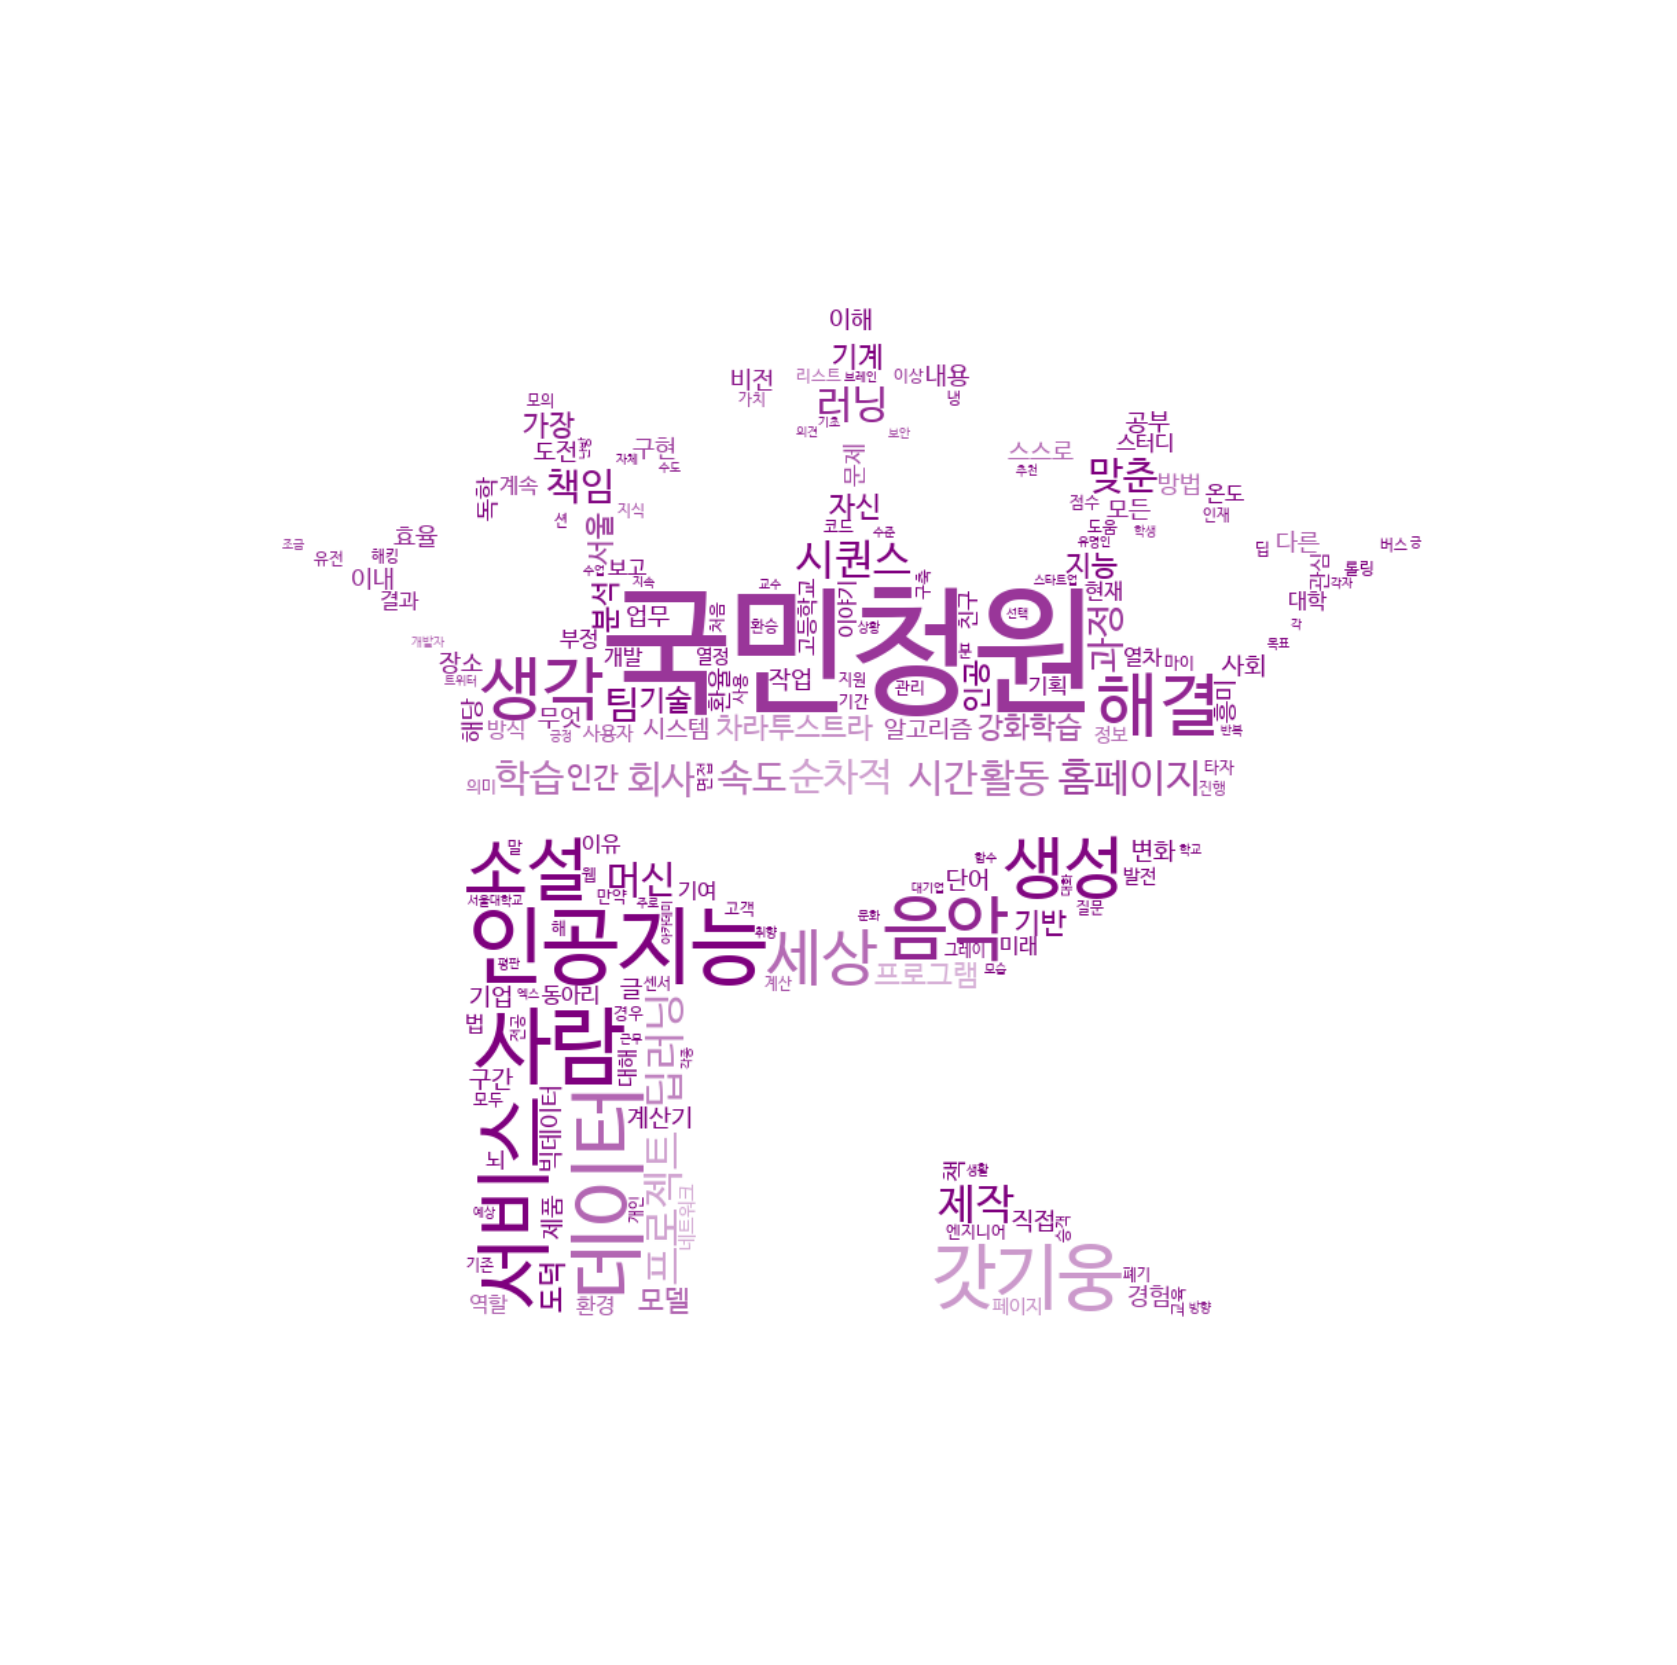

In [49]:
make_cloud(data,back_image_n="main.png" ,state="img", max_font_size_n = 100)

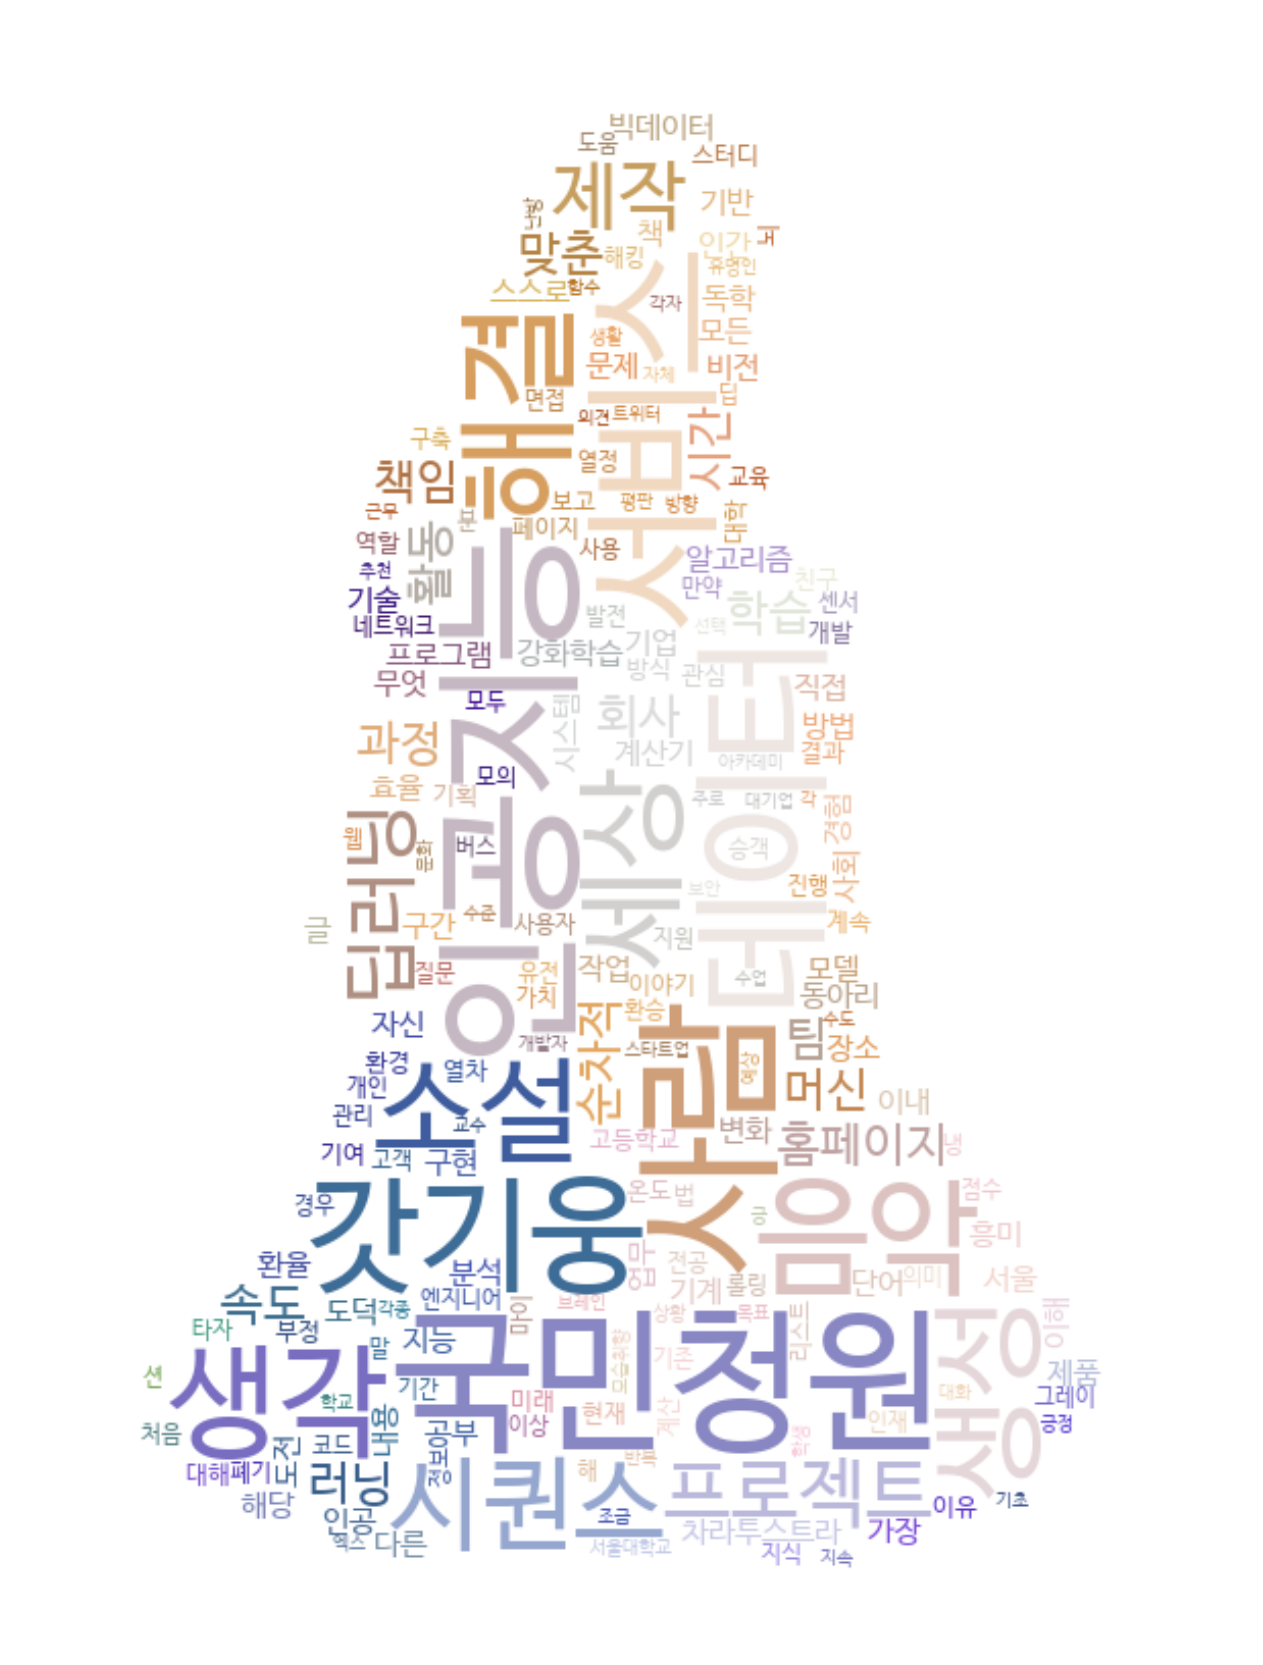

In [55]:
make_cloud(data,back_image_n="alice2.png" ,state="img", max_font_size_n = 75)

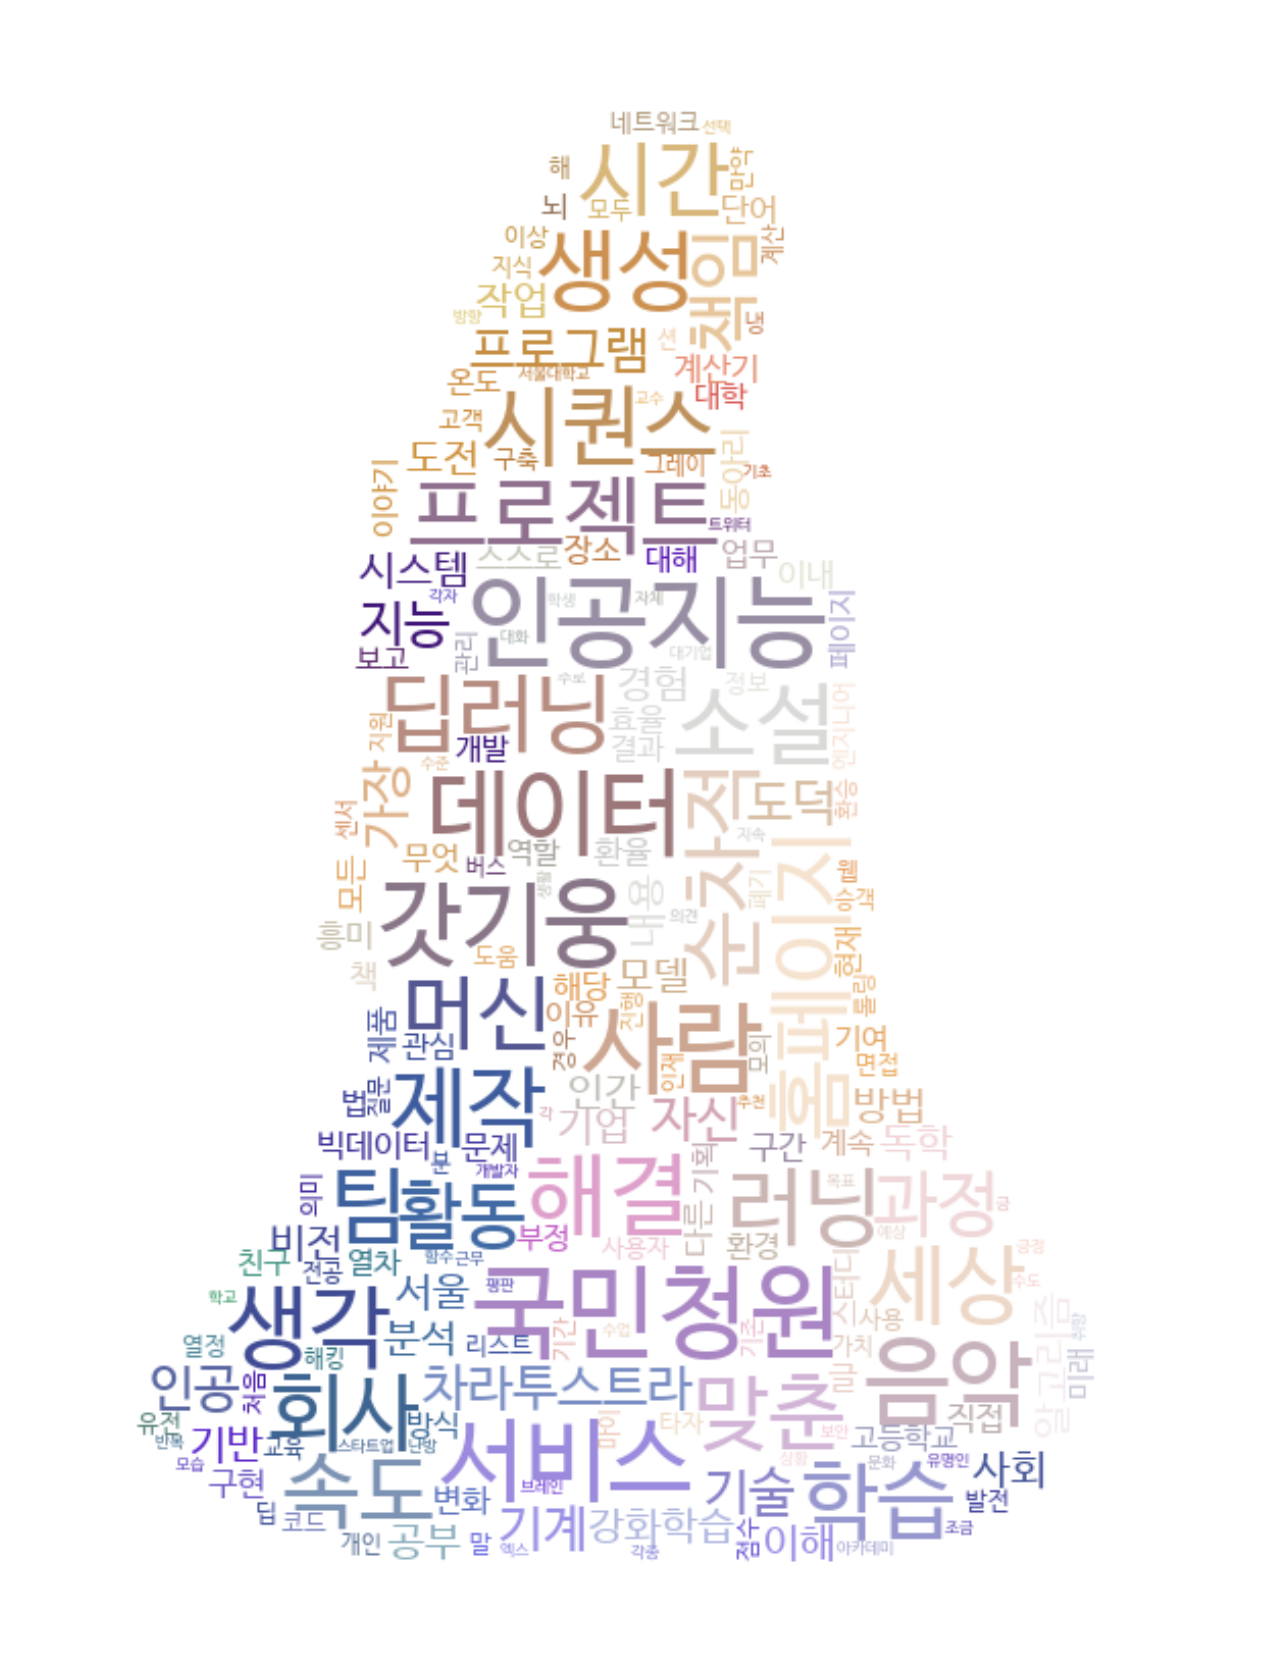

In [54]:
make_cloud(data,back_image_n="alice2.png" ,state="img", max_font_size_n = 50)

In [47]:
import pandas as pd

In [53]:
data_dict = {"names" : list(data.keys()), "nums" : list(data.values())}
df = pd.DataFrame(data_dict)
df

,names,nums
0,사람,146
1,데이터,98
2,생각,87
3,프로젝트,73
4,제작,72
5,러닝,69
6,학습,63
7,회사,60
8,머신,56
9,팀,55


In [54]:
df.to_csv("data.csv",index=False)